In [9]:
import pandas as pd 
import datetime
from stockai import Stock
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import numpy as np

%matplotlib inline

In [3]:
ticker = 'TSLA'

# Download historical data for required stocks (1 year)
ohlcv = pdr.get_data_yahoo(ticker, datetime.date.today() - datetime.timedelta(365), datetime.date.today())

ohlcv.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-22,768.500000,710.200012,762.640015,714.500000,37011700.0,714.500000
2021-02-23,713.609985,619.000000,662.130005,698.840027,66397000.0,698.840027
2021-02-24,745.000000,694.169983,711.849976,742.020020,36677100.0,742.020020
2021-02-25,737.210022,670.580017,726.150024,682.219971,38619900.0,682.219971
2021-02-26,706.700012,659.510010,700.000000,675.500000,41011300.0,675.500000


In [5]:
# Calculate Relative Strength Index (RSI)
"""
- The RSI provides technical traders signals about bullish and bearish price momentum, 
and it is often plotted beneath the graph of an asset's price.
- An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
"""
def RSI(DF, n):
    df = DF.copy()
    df['delta'] = df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain'] = np.where(df['delta'] >= 0, df['delta'], 0)
    df['loss'] = np.where(df['delta'] < 0, abs(df['delta']), 0)
    
    avg_gain = []
    avg_loss = []
    
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    
    df['avg_gain'] = np.array(avg_gain)
    df['avg_loss'] = np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1 + df['RS']))
    
    return df['RSI']

<AxesSubplot:xlabel='Date'>

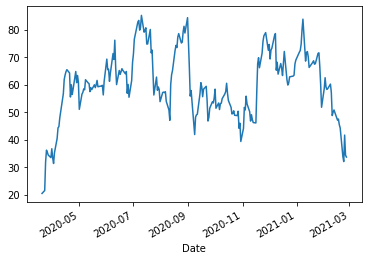

In [10]:
rsi = RSI(ohlcv, 14)

rsi.plot()